VAD test

In [1]:
%pylab inline
import pyart
from netCDF4 import Dataset
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib

## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [20]:
rad_file_path = '/home/rjackson/data/cfrad.20060123_143000.000_to_20060123_143811.000_CPOL_PPI_level1b.nc'
sounding_file_path = '/home/rjackson/data/soundings/twpsondewnpnC3.b1.20060123.111700.custom.cdf'

In [21]:
sounding = Dataset(sounding_file_path)
print(sounding.variables.keys())
alt = sounding['alt'][:]
u_wind = sounding['u_wind'][:]
v_wind = sounding['v_wind'][:]
u_interp = interp1d(alt, u_wind, bounds_error=False, fill_value=np.nan)
v_interp = interp1d(alt, v_wind, bounds_error=False, fill_value=np.nan)
alt_array = np.linspace(0, 15000, 40)
u_wind = u_interp(alt_array)
v_wind = v_interp(alt_array)
sounding.close()

odict_keys(['base_time', 'time_offset', 'time', 'pres', 'dp', 'tdry', 'wspd', 'u_wind', 'deg', 'v_wind', 'rh', 'alt', 'lat', 'lon'])


In [22]:
radar = pyart.io.read(rad_file_path)
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_masked('reflectivity')
gatefilter.exclude_invalid('region_dealias_velocity')
gatefilter.exclude_masked('region_dealias_velocity')
gatefilter.exclude_below('region_dealias_velocity', -75.0)
gatefilter.exclude_above('region_dealias_velocity', 75.0)
gatefilter.exclude_above('velocity_texture',3)

-9999.0


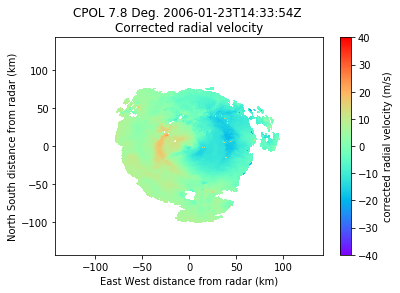

In [23]:
disp = pyart.graph.RadarDisplay(radar)
disp.plot_ppi('region_dealias_velocity', sweep=8, gatefilter=gatefilter, cmap='rainbow')
print(np.array(radar.fields['region_dealias_velocity']['data']).min())

In [24]:
things = pyart.retrieve.velocity_azimuth_display(radar, 'region_dealias_velocity', z_want=alt_array, 
                                                 gatefilter=gatefilter)

max height 2237.0 meters
max height 3963.0 meters
max height 5648.0 meters
max height 7411.0 meters
max height 9720.0 meters
max height 11987.0 meters
max height 14251.0 meters
max height 16978.0 meters
max height 20475.0 meters
max height 24923.0 meters
max height 30112.0 meters
max height 36435.0 meters
max height 44098.0 meters
max height 53261.0 meters
max height 64001.0 meters
max height 78999.0 meters
max height 96688.0 meters


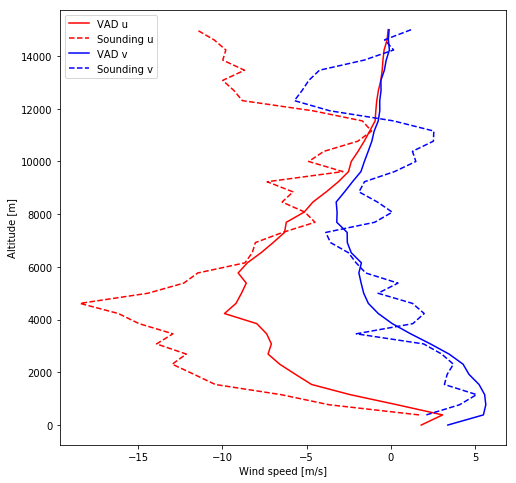

In [25]:
plt.figure(figsize=(8,8))
plt.plot(things.u_wind, things.height, color='r', label='VAD u')
plt.plot(u_wind, alt_array, color='r', linestyle='--', label='Sounding u')
plt.plot(things.v_wind, things.height, color='b', label='VAD v')
plt.plot(v_wind, alt_array, color='b', linestyle='--', label='Sounding v')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Altitude [m]')
plt.legend()